In [2]:
import os
import random
import shutil

In [4]:
train_dir = os.path.abspath(os.path.join("..",))
train_dir

'/root/d2l'

In [11]:
num = 0
for root, dirs, files in os.walk(train_dir):
    print(dirs)
    print("")
    num += 1


['d2l-zh-pytorch-slides', 'tensorflow', 'pytorch']

['chapter_linear-networks', 'chapter_convolutional-neural-networks', 'chapter_preliminaries', 'chapter_computer-vision', 'chapter_multilayer-perceptrons', '.git', 'chapter_convolutional-modern', 'chapter_deep-learning-computation', 'chapter_computational-performance']

[]

[]

['.ipynb_checkpoints']

[]

[]

[]

['logs', 'info', 'refs', 'objects', 'hooks', 'branches']

['refs']

['remotes', 'heads']

['origin']

[]

[]

[]

['remotes', 'tags', 'heads']

['origin']

[]

[]

[]

['info', 'pack']

[]

[]

[]

[]

[]

[]

[]

['chapter_preface', 'd2l', 'chapter_references', 'chapter_installation', 'chapter_recommender-systems', 'chapter_natural-language-processing-pretraining', 'img', 'chapter_optimization', 'chapter_appendix-tools-for-deep-learning', 'chapter_recurrent-modern', 'chapter_natural-language-processing-applications', 'chapter_linear-networks', 'chapter_convolutional-neural-networks', 'chapter_preliminaries', 'chapter_computer

/home/dingyoulong/.conda/envs/py38/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


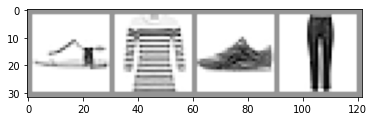

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))]) # 标准化操作

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',  
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:         
        img = img.mean(dim=0) # 其实就是一种数据维度的压缩，可以替换为img = img.squeeze(0)
    img = img / 2 + 0.5     # unnormalize 反归一化，反向操作
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0))) # 转置回去，这是由于pytorch tensor和pil数据的内部维度排列有些差异


class Net(nn.Module):  # 继承nn.Module模块
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)  # 这个虽然pool只是定义了一次，但会用到多次
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss() #结合了softmax和negative log loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# get some random training images
dataiter = iter(trainloader)      # 通过使用函数iter()，将返回一个iterator迭代器（可以使用.__next__()的对象）
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images) # 定义网格图片，网格化显示a batch of images.

# show images
matplotlib_imshow(img_grid, one_channel=True) # 我们的数据是单通道图片

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)


In [2]:
from torch.utils.tensorboard import SummaryWriter